<a href="https://colab.research.google.com/github/Shrey-Viradiya/Fast.ai-Jupyter-Notebooks/blob/main/fastbook_01_introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Mon Dec 28 06:47:48 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.27.04    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   55C    P8    11W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 12.7MB/s 
     |████████████████████████████████| 51kB 8.5MB/s 
     |████████████████████████████████| 1.1MB 49.5MB/s 
     |████████████████████████████████| 194kB 56.4MB/s 
     |████████████████████████████████| 61kB 10.5MB/s 
Mounted at /content/gdrive


In [3]:
from fastbook import *

In [4]:
from fastai.vision.all import *
path = untar_data(URLs.PETS)/'images'

In [5]:
path

Path('/root/.fastai/data/oxford-iiit-pet/images')

In [6]:
def is_cat(x): return x[0].isupper()

In [7]:
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224))

learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


epoch,train_loss,valid_loss,error_rate,time
0,0.160022,0.011895,0.004736,00:55


epoch,train_loss,valid_loss,error_rate,time
0,0.089901,0.038332,0.011502,00:59


In [16]:
img = PILImage.create('/content/download.jpg')
is_cat,_,probs = learn.predict(img)
print(f"Is this a cat?: {is_cat}.")
print(f"Probability it's a cat: {probs[1].item():.6f}")

Is this a cat?: True.
Probability it's a cat: 1.000000


In [17]:
path = untar_data(URLs.CAMVID_TINY)
dls = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames = get_image_files(path/"images"),
    label_func = lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
    codes = np.loadtxt(path/'codes.txt', dtype=str)
)

learn = unet_learner(dls, resnet34)
learn.fine_tune(8)

epoch,train_loss,valid_loss,time
0,2.852657,2.569667,00:01


epoch,train_loss,valid_loss,time
0,2.082204,1.645255,00:01
1,1.718895,1.162236,00:01
2,1.518155,1.003050,00:01
3,1.346425,1.051693,00:01
4,1.219569,0.753790,00:01
5,1.102383,0.760018,00:01
6,1.005531,0.672514,00:01
7,0.927855,0.664831,00:01


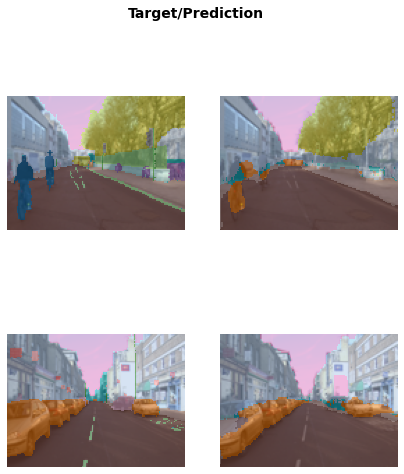

In [18]:
learn.show_results(max_n=6, figsize=(7,8))